# Regenerate singular ratio distribution plot

In [3]:
import os
import random

import numpy as np

## Configurations

In [2]:
results_dir = "../results/single_source"

In [26]:
pos = '000'
music_name = 'mahler_vl1a_6'

## Load data

### Ratio list

In [28]:
ratio_list_path = os.path.join(results_dir, pos, music_name+'.npy')
ratio_list = np.load(ratio_list_path)

In [29]:
print(f"{ratio_list.shape = }")
print(f"{max(ratio_list) = }")


ratio_list.shape = (164780,)
max(ratio_list) = 755.3276775503354


### Parameters config

In [30]:
import json
config_path = os.path.join(results_dir, pos, music_name+'.json')
with open(config_path, 'r') as f:
    config = json.load(f)
config

{'sndfile': 'mahler_vl1a_6',
 'pos_grid': [0, 0, 0],
 'dist_mic': 2.2045407685048604,
 'pareto_params': {'shape': 0.9472461242106784,
  'scale': 4.853808399543269,
  'location': 1.0173214201132028}}

## Reload params

In [101]:
dist = config.get('dist_mic')

In [34]:
shape, scale, location = config.get('pareto_params').values()

## Reconstruct plot

In [37]:
from scipy.stats import genpareto

In [93]:
x = np.linspace(0, 60, 500)

In [94]:
fitted_data = genpareto.pdf(x, shape, loc=location, scale=scale)

In [95]:
import matplotlib.pyplot as plt

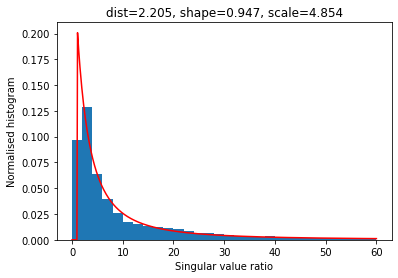

In [103]:
plt.figure()
n, bins, patches = plt.hist(
    ratio_list, 
    bins=range(0, 60+1, 2),
    density=True, 
    # stacked=True,
) # TODO: Higher number of bins needed for better viz
plt.plot(x, fitted_data, 'r-')
plt.ylabel("Normalised histogram")
plt.xlabel("Singular value ratio")
# plt.title(f"{dist=:.3f}, {shape=:.3f}, {scale=:.3f}")
plt.show()